In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import linalg
from scipy.spatial import distance
import statistics
import random

# 1.Generisati po 200 uzoraka dvodimenzionalnih normalnih raspodela sa datim parametrima. Uzorke prikazati na istoj slici istom bojom. Cilj vežbe je izvršiti particionisanje tako dobijenog skupa

In [2]:
mean1 = [3, 2]
cov1 = [[1.5, 0.1], [0.1, 1.5]] 
mean2 = [8,5]
cov2 = [[3,0.2],[0.2,3]]
mean3 = [4, 10]
cov3 = [[2, -0.6], [-0.6, 1]] 
mean4 = [10,9]
cov4 = [[1,0.3],[0.3,1]]

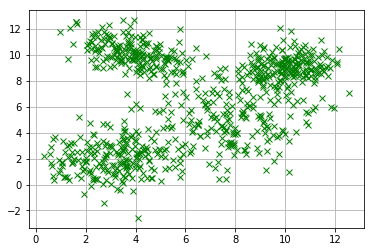

In [5]:
x1, y1 = np.random.multivariate_normal(mean1, cov1, 200).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 200).T
x3, y3 = np.random.multivariate_normal(mean3, cov3, 200).T
x4, y4 = np.random.multivariate_normal(mean4, cov4, 200).T
plt.plot(x1, y1, 'gx', x2, y2, 'gx', x3, y3, 'gx', x4, y4, 'gx' )
plt.grid()
plt.show()

# 2.Napisati funkciju koja implementira iterativni K -means algoritam. Funkcija kao ulazne argumente prima uzorački skup generisan u 1), željeni broj klastera K i unapred na neki način date polazne vrednosti centroida (centara) klastera, a kao vrednost vraća vektore koji sadrže razvrstane uzorke po klasterima.

In [8]:
x = np.concatenate((x1,x2,x3,x4)) #uzoracki skup generisan u 1. delu
y = np.concatenate((y1,y2,y3,y4))
data = list(zip(list(x),list(y)))
data

[(1.8970583184237613, 1.7844584234427012),
 (4.0973462073775355, 3.875974324092166),
 (3.0315385771659065, 0.031870009374369346),
 (3.9820443374584866, 1.257777102069935),
 (2.2950866806830375, 3.9174158347333834),
 (2.3699746535678003, 0.4412841462311008),
 (2.5334420907272497, 1.6297755175212314),
 (1.5241243095450865, 3.198699638181126),
 (4.783474577084181, 2.6600464186856363),
 (3.4303494584847893, 2.919215713745259),
 (3.2788299473516704, 2.3994478849003418),
 (1.1048066600684363, 3.3876133155937005),
 (5.694627285466079, 2.7163762219528955),
 (0.613128896167896, 1.6470264077930943),
 (1.7038991938820307, 1.9049306256910867),
 (2.3027894018472503, 0.37711538939651557),
 (2.7006399286739473, 0.06472798206930364),
 (2.7809439010870927, 2.9680284945945976),
 (4.488832034598386, 4.248666436045197),
 (4.495369409605626, 2.346119410779962),
 (4.07914026839413, 2.3283725607960126),
 (3.8713211902556433, 0.508509531343531),
 (1.7345344786724675, 5.207983719183071),
 (2.9122861321304145, 

In [9]:
centri = random.choices(data, k = 5) #proizvoljni centri među tačkama skupa
centri

[(8.271402758343918, 7.307648220074039),
 (10.637847210087191, 10.477642969597646),
 (4.580931736248532, 9.982922186027585),
 (3.4878604113213405, 2.547349604642571),
 (5.878308693417595, 2.9854442743825076)]

In [125]:
centri_random_x = np.random.rand(5) * 12 #random izabrani centri 
centri_random_y = np.random.rand(5) * 12
centri_random =  list(zip(centri_random_x,centri_random_y))
centri_random

[(10.038477358109214, 2.4179759934022784),
 (9.526509851894424, 4.250280892441667),
 (0.8325804792974738, 1.1266323388474677),
 (11.588796927761585, 0.5645210544293424),
 (10.29375048245411, 2.2721950481533475)]

In [215]:
def funkcija(data,K,centri,br_iteracija): 
    ite = 0
    vector = []
    d = {}

    for i in range(0,K):
        d['kl'+str(i)]=[]
    for x in data:
        x_rastojanja = []
        for i in range(0,K):
            rastojanje = np.sqrt((x[0]-centri[i][0])**2 + (x[1]-centri[i][1])**2)
            x_rastojanja.append(rastojanje)
        c_kl = np.argmin(x_rastojanja)

        d['kl'+str(c_kl)].append(x)
      `
    ji_list = []
    for i in range(0,K):
        Ji = 0
        for x in d['kl'+str(i)]:
            Ji = Ji + (x[0] - centri[i][0])**2 + (x[1]- centri[i][1])**2
        ji_list.append(Ji)
    J = sum(ji_list)
    ite +=1
    print('Broj iteracije: '+'\tJ\t '+'  Parcijalne sume po klasterima')
    print(ite,"\t\t",J,ji_list)
      
    while(ite < br_iteracija):
        novi_centrix =[]
        novi_centriy = []
        for i in range(0,K):
            koorx ,koory = [],[]
            for j in range(len( d['kl'+str(i)])):
                koorx.append(d['kl'+str(i)][j][0])
                koory.append(d['kl'+str(i)][j][1])
            novi_centrix.append(statistics.mean(koorx))
            novi_centriy.append(statistics.mean(koory))
        novi_centri = list(zip(novi_centrix,novi_centriy))
        d = {}
        for i in range(0,K):
              d['kl'+str(i)]=[]
        
        for x in data:
            x_rastojanja = []
            for i in range(0,K):
                rastojanje = np.sqrt((x[0]-novi_centri[i][0])**2 + (x[1]-novi_centri[i][1])**2)
                x_rastojanja.append(rastojanje)
            c_kl = np.argmin(x_rastojanja)

          
            d['kl'+str(c_kl)].append(x)

        ji_list = []
        for i in range(0,K):
            Ji = 0
            for x in d['kl'+str(i)]:
                Ji = Ji + (x[0]-novi_centri[i][0])**2 + (x[1]-novi_centri[i][1])**2
            ji_list.append(Ji)
        J = sum(ji_list)
        ite +=1
       
        print(ite,"\t\t",J,ji_list)
        if centri == novi_centri:
            break
        else:
            centri = novi_centri
    for i in range(0,K):
        vector.append(d['kl'+str(i)])
        
    colors = [ "gx", "r+", "b^", "mv","yo"]
    for x, y in zip(vector,colors):
        a,b = zip(*x) 
        plt.plot(a,b,y)
    plt.grid()
    plt.show()
        
    return(vector)

Broj iteracije: 	J	   Parcijalne sume po klasterima
1 		 15181.886702757343 [7600.137820386979, 677.2137152138872, 6904.535167156476]
2 		 5407.28592367257 [2647.491969707076, 1031.9285997442362, 1727.865354221258]
3 		 4247.564669383486 [2216.5028050466417, 1361.7320121097855, 669.3298522270588]
4 		 4094.7808559190016 [2084.145617997049, 1471.251042373292, 539.3841955486607]
5 		 4080.9611444824204 [2012.9753738780225, 1556.0523309606274, 511.9334396437709]
6 		 4078.139805515029 [1996.9443789930208, 1569.5097479305953, 511.68567859141274]
7 		 4078.0393272002225 [1996.892181172375, 1569.4614674364343, 511.68567859141274]
8 		 4078.0393272002225 [1996.892181172375, 1569.4614674364343, 511.68567859141274]


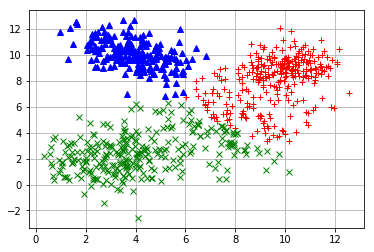

[[(1.8970583184237613, 1.7844584234427012),
  (4.0973462073775355, 3.875974324092166),
  (3.0315385771659065, 0.031870009374369346),
  (3.9820443374584866, 1.257777102069935),
  (2.2950866806830375, 3.9174158347333834),
  (2.3699746535678003, 0.4412841462311008),
  (2.5334420907272497, 1.6297755175212314),
  (1.5241243095450865, 3.198699638181126),
  (4.783474577084181, 2.6600464186856363),
  (3.4303494584847893, 2.919215713745259),
  (3.2788299473516704, 2.3994478849003418),
  (1.1048066600684363, 3.3876133155937005),
  (5.694627285466079, 2.7163762219528955),
  (0.613128896167896, 1.6470264077930943),
  (1.7038991938820307, 1.9049306256910867),
  (2.3027894018472503, 0.37711538939651557),
  (2.7006399286739473, 0.06472798206930364),
  (2.7809439010870927, 2.9680284945945976),
  (4.488832034598386, 4.248666436045197),
  (4.495369409605626, 2.346119410779962),
  (4.07914026839413, 2.3283725607960126),
  (3.8713211902556433, 0.508509531343531),
  (1.7345344786724675, 5.207983719183071),

In [217]:
t3 = funkcija(data,3,centri,13) 
t3

Broj iteracije: 	J	   Parcijalne sume po klasterima
1 		 12679.045684523895 [915.1371786654958, 677.2137152138872, 6904.535167156476, 4182.159623488035]
2 		 3762.2469086477777 [830.0368477517925, 472.4442785257938, 1528.5319035273874, 931.233878842804]
3 		 2424.8028939473274 [691.1756090992114, 505.1566583693745, 519.1272002629646, 709.3434262157768]
4 		 2395.0930384399308 [688.9582265413513, 512.1983163295374, 511.270753824769, 682.6657417442731]
5 		 2394.4030017304476 [688.4669788649272, 512.0972870478518, 511.270753824769, 682.5679819929001]
6 		 2394.4030017304476 [688.4669788649272, 512.0972870478518, 511.270753824769, 682.5679819929001]


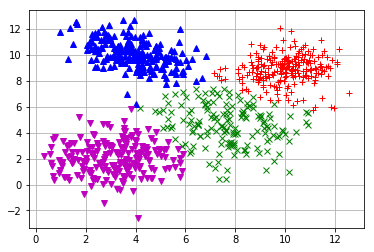

[[(5.084343639941008, 4.393535104803492),
  (5.263624580824953, 4.467123239116878),
  (8.261353937451885, 5.523389931514068),
  (7.987609155477019, 4.367018635398011),
  (8.86519058363338, 2.824140358104718),
  (10.182360473520717, 5.267959766222862),
  (5.90303894720078, 7.152958098002657),
  (7.022899768784786, 4.342026600852394),
  (6.2363940936458455, 2.5965497634934),
  (7.818943570107549, 2.958747855613753),
  (10.936134161891527, 4.552230718439088),
  (9.382572690091283, 5.119757605596438),
  (9.15622557462095, 4.934297074930267),
  (9.278505856081877, 2.614767717093177),
  (8.080269010159432, 2.699438731210748),
  (7.145995680699167, 5.092539090332888),
  (8.99035835455691, 5.1510281033924965),
  (7.243079582740179, 4.150156727427608),
  (5.12250941872529, 5.757936788608058),
  (6.890895642245688, 6.325092036209263),
  (7.409544896084219, 3.1329436432855697),
  (9.246640984804941, 1.1153031278764782),
  (8.390619862643508, 5.199106842783191),
  (7.789242415099028, 4.62353167203

In [218]:
t4 = funkcija(data,4,centri,13) 
t4

Broj iteracije: 	J	   Parcijalne sume po klasterima
1 		 3962.9734462382485 [110.25445424197262, 636.2058178673293, 393.2210226068137, 2062.3604602503265, 760.9316912718064]
2 		 2279.110116639438 [131.71441088044205, 485.0667798204019, 297.26794081937516, 708.6524555197259, 656.4085295994929]
3 		 2186.370578613697 [141.87069826514673, 474.0725851267957, 270.37630941096495, 667.9894545741884, 632.0615312366012]
4 		 2163.830383192131 [162.14310920327637, 489.6586462838509, 271.2227119107706, 667.5422830000937, 573.2636327941394]
5 		 2142.425963861195 [185.22251243134394, 489.5804454854162, 251.97377198140563, 667.5422830000937, 548.1069509629358]
6 		 2133.120342690255 [191.51236821501476, 489.5804454854162, 248.87677418471296, 661.2145232310442, 541.9362315740666]
7 		 2129.7093849847806 [191.30631143905865, 502.2131432114359, 277.40953725041334, 661.1839543432715, 497.59643874060134]
8 		 2125.5645417604305 [195.8548947022449, 502.1502939690182, 285.0545546681999, 661.1839543432715

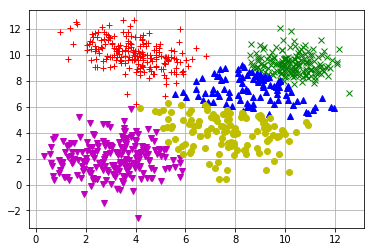

[[(10.225399100435371, 8.63068525504),
  (10.4635974956206, 8.814177041047735),
  (9.307660588890686, 8.525715586746873),
  (12.545275706807208, 7.015858040618509),
  (11.185360758429402, 8.079354049934713),
  (9.533251204868733, 8.455608011128524),
  (10.407256527880005, 9.696692395186771),
  (8.997385437887658, 10.748105636686695),
  (10.01979555533825, 8.964035926873862),
  (9.628075780154148, 10.63689181648217),
  (10.758205822973926, 9.639571328777786),
  (8.904419801099142, 9.651148560468355),
  (9.551505767162665, 9.803230873312026),
  (10.637847210087191, 10.477642969597646),
  (10.247471349145087, 8.861444916146299),
  (10.401617547129801, 8.605215333881246),
  (10.673442801598034, 10.0215849144726),
  (10.811346062831774, 10.064262004083503),
  (9.140128738231212, 9.18720672377182),
  (9.350617005922095, 9.92703087061825),
  (10.428864275235512, 9.282446817789992),
  (10.831490101004073, 8.422761570093751),
  (8.89607731951348, 9.850325063229866),
  (10.368698023483256, 7.765

In [225]:
t5 = funkcija(data,5,centri,13) 
t5

In [224]:
centri = random.choices(data, k = 5) #za analizu 
centri

[(10.407256527880005, 9.696692395186771),
 (3.4213467553475008, 9.545110338602662),
 (10.401617547129801, 8.605215333881246),
 (5.7704419483647085, 1.6290984716688084),
 (6.511366734965723, 4.594635905718034)]

In [143]:
centri_random_x = np.random.rand(5) * 12 
centri_random_y = np.random.rand(5) * 12
centri_random =  list(zip(centri_random_x,centri_random_y))
centri_random

[(3.821972452817646, 10.701679042695744),
 (0.34637142943378496, 3.8896329678666106),
 (11.960046381215124, 10.374955400541632),
 (5.342506081364272, 6.008610480088903),
 (7.187875732096083, 1.6496966245091347)]

Broj iteracije: 	J	   Parcijalne sume po klasterima
1 		 12133.598672740369 [1706.4595901317596, 5905.446025170081, 4521.693057438529]
2 		 4198.794957593729 [706.6394986891468, 1891.7273697629514, 1600.4280891416315]
3 		 4082.4508006074498 [540.4646029402753, 1950.6654783993133, 1591.320719267861]
4 		 4078.3797237858907 [527.8212988739972, 1980.9585297374822, 1569.5998951744116]
5 		 4078.0831356313056 [527.7703530817065, 1980.8513151131647, 1569.4614674364343]
6 		 4078.0831356313056 [527.7703530817065, 1980.8513151131647, 1569.4614674364343]


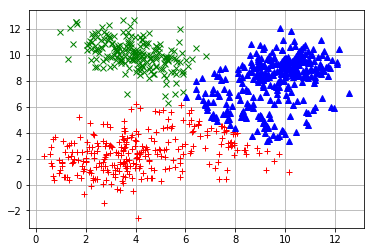

[[(5.90303894720078, 7.152958098002657),
  (5.312235343139476, 6.313945445077373),
  (5.175139369849076, 6.796334187110302),
  (5.234006106541626, 8.226110750304906),
  (3.6393792703827472, 6.993706232887014),
  (5.569319904762106, 7.003418786135769),
  (1.6479800365414157, 12.373727078610631),
  (3.78980080214474, 10.945188341325995),
  (1.4979377955027853, 10.839319343830143),
  (2.382581352279889, 10.31270607859522),
  (5.875875437501009, 10.13240815478096),
  (2.4389808246585662, 11.358528647837776),
  (4.630625258804543, 8.716184476081937),
  (5.626839990807625, 9.677253924069499),
  (5.309592960354631, 9.573558520677677),
  (2.6081491938798775, 10.610275239852083),
  (2.518015882478828, 10.174806488615456),
  (3.962293297035578, 9.637003188254235),
  (2.039203911376716, 10.34551750636933),
  (4.813033579455261, 9.13626853305401),
  (5.773089000955437, 11.99780221205776),
  (4.809367242881137, 9.793899959323012),
  (2.1564920118109447, 11.044084588042809),
  (3.901444765097664, 10

In [230]:
r = funkcija(data,3,centri_random,10)
r

In [228]:
def funkcija_l1(data,K,centri,br_iteracija):
    ite = 0
    vector=[]
    d = {}

    for i in range(0,K):
        d['kl'+str(i)]=[]
    for x in data:
        x_rastojanja = []
        for i in range(0,K):
            rastojanje = abs(x[0]-centri[i][0]) + abs(x[1]-centri[i][1])
            x_rastojanja.append(rastojanje)
        c_kl = np.argmin(x_rastojanja)

        d['kl'+str(c_kl)].append(x)
   
    ji_list = []
    for i in range(0,K):
        Ji = 0
        for x in d['kl'+str(i)]:
            Ji = Ji + (abs(x[0] - centri[i][0]) + abs(x[1]- centri[i][1]))**2
        ji_list.append(Ji)
    J = sum(ji_list)
    ite +=1
    print('Broj iteracije: '+'\tJ\t '+'  Parcijalne sume po klasterima')
    print(ite,"\t\t",J,ji_list)
      
      
    while(ite < br_iteracija):
        novi_centrix =[]
        novi_centriy = []
        for i in range(0,K):
            koorx ,koory = [],[]
            for j in range(len( d['kl'+str(i)])):
                koorx.append(d['kl'+str(i)][j][0])
                koory.append(d['kl'+str(i)][j][1])
            novi_centrix.append(statistics.mean(koorx))
            novi_centriy.append(statistics.mean(koory))
        novi_centri = list(zip(novi_centrix,novi_centriy))
        d = {}
        for i in range(0,K):
              d['kl'+str(i)]=[]
        
        for x in data:
            x_rastojanja = []
            for i in range(0,K):
                rastojanje = abs(x[0]-novi_centri[i][0]) + abs(x[1]-novi_centri[i][1])
                x_rastojanja.append(rastojanje)
            c_kl = np.argmin(x_rastojanja)

          
            d['kl'+str(c_kl)].append(x)

        ji_list = []
        for i in range(0,K):
            Ji = 0
            for x in d['kl'+str(i)]:
                Ji = Ji + (abs(x[0]-novi_centri[i][0]) + abs(x[1]-novi_centri[i][1]))**2
            ji_list.append(Ji)
        J = sum(ji_list)
        ite +=1
        print(ite,"\t\t",J,ji_list)
        if centri == novi_centri:
            break
        else:
            centri = novi_centri
    for i in range(0,K):
            vector.append(d['kl'+str(i)])

    colors = [ "gx", "r+", "b^", "mv","yo"]
    for x, y in zip(vector,colors):
        a,b = zip(*x) 
        plt.plot(a,b,y)
    plt.grid()
    plt.show()

    return(vector)   

Broj iteracije: 	J	   Parcijalne sume po klasterima
1 		 5938.848168833647 [169.03700385244102, 967.1035640863767, 556.464670410701, 2915.497001398593, 1330.7459290855354]
2 		 3820.2128675205468 [216.78301921069496, 822.1323719450562, 450.49857583957646, 1131.876717121765, 1198.922183403454]
3 		 3524.272939349118 [238.2611743844462, 882.0571449175142, 434.76421338158246, 1044.4026171088394, 924.7877895567357]
4 		 3497.861698876026 [272.5797050725795, 865.6494363257281, 494.9542213878242, 1032.4973139111125, 832.1810221787817]
5 		 3451.2378591611027 [282.4370704179515, 865.556245309684, 504.64479629308914, 1032.5479573818154, 766.0517897585627]
6 		 3432.735435240485 [302.0515415347608, 844.9303367205836, 502.9193222532661, 1021.4343303473047, 761.39990438457]
7 		 3427.84606949769 [307.76687300610865, 844.8036714476222, 504.1866278338249, 1021.4921512893571, 749.5967459207777]
8 		 3424.935575793115 [317.0090198968739, 844.8036714476222, 531.7624444495459, 1021.4921512893571, 709.8

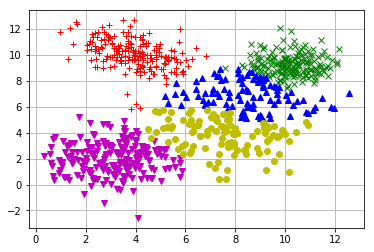

[[(10.225399100435371, 8.63068525504),
  (10.4635974956206, 8.814177041047735),
  (9.307660588890686, 8.525715586746873),
  (11.185360758429402, 8.079354049934713),
  (10.088940250218364, 7.461310096302238),
  (7.601973382424272, 8.994688871248176),
  (9.533251204868733, 8.455608011128524),
  (10.407256527880005, 9.696692395186771),
  (8.997385437887658, 10.748105636686695),
  (10.01979555533825, 8.964035926873862),
  (9.628075780154148, 10.63689181648217),
  (10.758205822973926, 9.639571328777786),
  (8.904419801099142, 9.651148560468355),
  (9.551505767162665, 9.803230873312026),
  (8.885438204353985, 8.563439982772088),
  (10.637847210087191, 10.477642969597646),
  (10.247471349145087, 8.861444916146299),
  (10.401617547129801, 8.605215333881246),
  (10.673442801598034, 10.0215849144726),
  (10.811346062831774, 10.064262004083503),
  (9.140128738231212, 9.18720672377182),
  (9.350617005922095, 9.92703087061825),
  (10.428864275235512, 9.282446817789992),
  (10.831490101004073, 8.422

In [229]:
tl1 = funkcija_l1(data,5,centri,15) 
tl1